In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sktime.forecasting.trend import PiecewiseLinearTrendForecaster
from sktime.forecasting.base import ForecastingHorizon

In [12]:
alpha_1 = -3
alpha_2 = -1
alpha_3 = -0.5
alpha_4 = 0
constant = 100
breakpoint_1 = 7
breakpoint_2 = 10
breakpoint_3 = 14
n_points = 200

np.random.seed(0)
xx = np.linspace(0, 20, n_points)

yy = constant + alpha_1 * xx \
    + (alpha_2 - alpha_1) * np.maximum(xx - breakpoint_1, 0) \
    + (alpha_3 - alpha_2) * np.maximum(xx - breakpoint_2, 0) \
    + (alpha_4 - alpha_3) * np.maximum(xx - breakpoint_3, 0) \
    + np.random.normal(size=n_points)

y = pd.DataFrame({"y":yy})
y.index = pd.date_range(start="2012-01-31",periods=n_points,freq="M")

In [13]:
pwl =  PiecewiseLinearTrendForecaster(n_changepoints=25,
                                      changepoint_prior_scale = 0.05,
                                      changepoint_range=0.8,
                                      verbose=False)


fh=ForecastingHorizon(y.index, is_relative=False)

y_pred_prophet = pwl.fit(y).predict(fh)

09:25:56 - cmdstanpy - INFO - Chain [1] start processing
09:25:56 - cmdstanpy - INFO - Chain [1] done processing


In [14]:
idx = pd.date_range(start=y.index[-1],periods=30,freq="M")
fh=ForecastingHorizon(idx, is_relative=False)

pred = pwl.predict(fh)

np.diff(pred.y,1)

array([0.00319357, 0.00330002, 0.00319357, 0.00330002, 0.00330002,
       0.00298066, 0.00330002, 0.00319357, 0.00330002, 0.00319357,
       0.00330002, 0.00330002, 0.00319357, 0.00330002, 0.00319357,
       0.00330002, 0.00330002, 0.00298066, 0.00330002, 0.00319357,
       0.00330002, 0.00319357, 0.00330002, 0.00330002, 0.00319357,
       0.00330002, 0.00319357, 0.00330002, 0.00330002])

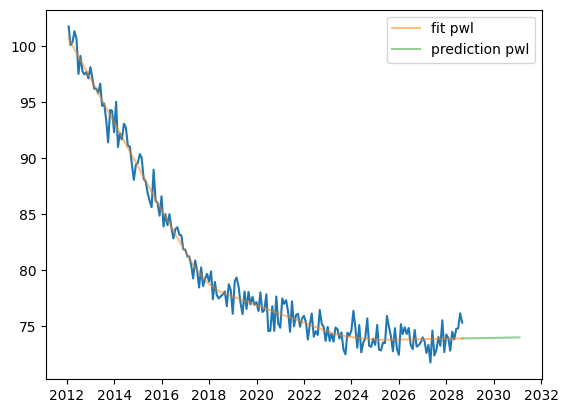

In [15]:
plt.plot(y.index, y.values)
plt.plot(y_pred_prophet,label="fit pwl", alpha=0.5)
plt.plot(pred,label="prediction pwl", alpha=0.5)
plt.legend()
plt.show()